In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
train_Path = r'C:\Users\anshul\Desktop\MS\Subjects\Spring 2022\Data Analytics\FINAL PROJECT\Image recognition\ImageDataSet'
test_Path = r'C:\Users\anshul\Desktop\MS\Subjects\Spring 2022\Data Analytics\FINAL PROJECT\Image recognition\ImageTestDataSet\ImageTestDataSet'

In [4]:
img = [224, 224] 

In [5]:
resnet = ResNet50(
    input_shape = img + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights
    include_top = False   # 
)

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob(train_Path + '/*')
folders

['C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Adult',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Airplane',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Alpaca',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Bird',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Bus',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Car',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recognition\\ImageDataSet\\Cat',
 'C:\\Users\\anshul\\Desktop\\MS\\Subjects\\Spring 2022\\Data Analytics\\FINAL PROJECT\\Image recogn

In [9]:
labels = ['Adult', 'Airplane', 'Alpaca','Bird', 'Bus', 'Car', 'Cat', 'Child', 'Dog', 'Elephant', 'Flower', 'Giraffe', 'Horse', 'Monkey', 'Panda', 'Reptile', 'Train', 'Vessel', 'Zebra']

In [10]:
x = Flatten() (resnet.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [12]:
model = Model(inputs = resnet.input, outputs = prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [14]:
model.compile (loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [15]:
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = img,
    batch_size = 32,
    class_mode = 'categorical' 
)

Found 2218 images belonging to 19 classes.


In [18]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = img,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 570 images belonging to 19 classes.


In [19]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

C:\Users\anshul\AppData\Local\Temp/ipykernel_22836/2225438285.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
70/70 [==============================] - 220s 3s/step - loss: 8.0207 - accuracy: 0.1019 - val_loss: 3.1623 - val_accuracy: 0.1596
Epoch 2/10
70/70 [==============================] - 329s 5s/step - loss: 3.4169 - accuracy: 0.1948 - val_loss: 2.9957 - val_accuracy: 0.2105
Epoch 3/10
70/70 [==============================] - 433s 6s/step - loss: 3.1499 - accuracy: 0.2362 - val_loss: 3.2798 - val_accuracy: 0.2298
Epoch 4/10
70/70 [==============================] - 429s 6s/step - loss: 3.0488 - accuracy: 0.2687 - val_loss: 3.0898 - val_accuracy: 0.2719
Epoch 5/10
70/70 [==============================] - 418s 6s/step - loss: 2.6617 - accuracy: 0.3079 - val_loss: 3.1672 - val_accuracy: 0.2561
Epoch 6/10
70/70 [==============================] - 414s 6s/step - loss: 3.4772 - accuracy: 0.2610 - val_loss: 4.2239 - val_accuracy: 0.2702
Epoch 7/10
70/70 [==============================] - 440s 6s/step - loss: 2.9122 - accuracy: 0.3350 - val_loss: 3.1737 - val_accuracy: 0.2825
Epoch 8/10
70

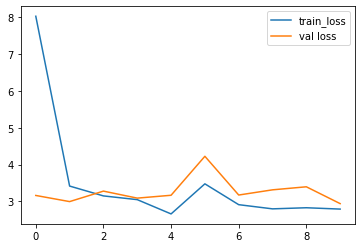

In [20]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

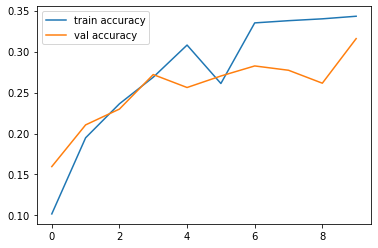

In [21]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [22]:
#prediction = model.predict(test_set)
#prediction

In [23]:
#prediction = np.argmax(prediction, axis = 1)
#prediction

In [24]:
model.evaluate(test_set,batch_size=512)

18/18 [==============================] - 87s 5s/step - loss: 2.9336 - accuracy: 0.3333


[2.9336163997650146, 0.3333333432674408]

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [26]:
#predict
y_pred=model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([ 3, 16,  7, 13,  3,  4,  6, 15,  9, 14, 12,  3,  6,  9, 12,  3,  9,
       14,  3,  3, 14,  1,  9,  4,  3,  3,  3, 14, 18,  7, 15,  9, 14, 15,
        3,  4, 12,  6, 14, 12,  3,  4,  4,  3,  3,  7,  9,  6,  3,  7,  4,
        9,  3,  7, 14, 14, 14,  3,  7,  9, 15,  6, 14,  7,  3, 15,  9,  9,
        4,  9,  7, 18,  6, 12, 12,  1, 14,  3,  9,  6,  7,  3,  9, 14, 17,
        9, 15,  3,  3,  9,  8,  8,  9, 15,  9, 14,  1,  9, 14, 14,  3,  4,
        7,  8, 17,  9,  7,  9, 15,  3, 14,  6, 13,  9,  4,  4,  6, 15,  6,
        8,  3, 11, 17, 14,  7, 13,  7, 12,  4,  9, 12,  4, 17, 12,  9,  9,
        6, 14,  4,  9,  8,  3,  7,  3,  4,  9, 17,  7,  3,  7,  8,  3,  2,
       12,  0, 11,  3,  4,  3,  1,  4, 14, 15,  9,  3,  4, 15,  3,  3,  6,
        7,  2,  3, 15,  2,  9,  6,  4,  3,  8, 14,  3,  3,  7,  7,  4, 14,
       15,  9, 13, 14, 15,  1,  7, 15, 15, 15,  9,  3,  9,  9, 14,  9, 12,
        6,  9,  3,  7,  3,  3,  3, 14,  3,  4,  3, 14, 15,  3,  4, 14, 11,
        4, 14, 12, 18,  7

In [27]:
#cm = confusion_matrix(test_set.classes, y_pred)
#print(cm)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)

    
    th = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > th else "black")
 


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
import itertools

ylabels =["Adult","Airplane","Alpaca","Bird","Bus","Car","Cat","Child","Dog","Elephant","Flower","Giraffe","Horse","Monkey","Panda","Reptile","Train","Vessel","Zebra"]

plot_confusion_matrix(cm,ylabels, title='Confusion Matrix')

NameError: name 'cm' is not defined

In [ ]:
#Predicting and Saving it as a CSV file
#y_pred = model.predict(test_set)
#y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 570), name="ImageId"), y_pred], axis=1)
sub.to_csv(r'C:\Users\anshul\Desktop\MS\Subjects\Spring 2022\Data Analytics\FINAL PROJECT\Image recognition\solution_image_classification.csv', index=False)